<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
 
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
   
</div>

<hr>


In [3]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [4]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [5]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [6]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In [7]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

 Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [8]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [9]:
tesla_data= pd.DataFrame (
    tesla.history(period="max")
)
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [10]:
tesla_data.reset_index (inplace= True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Use Webscraping to Extract Tesla Revenue Data


In [108]:
import requests
html_data = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm').text

In [109]:
from bs4 import BeautifulSoup
# html_data already contains the html content. requests.get() is not required.
# html_data_content = requests.get(html_data).content
soup = BeautifulSoup(html_data, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Tesla Revenue 2010-2022 | TSLA | MacroTrends
  </title>
  <meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter end

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [110]:
# Step 1: Find all tables
tables = soup.find_all('table')

# Step 2: Identify the relevant table
target_table = None
for table in tables:
    if 'Tesla Quarterly Revenue' in table.text:
        target_table = table
        break

# Step 3: Initialize a DataFrame
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Step 4: Loop through rows
if target_table:
    rows = target_table.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        if len(cols) >= 2:  # Ensure there are at least 2 columns
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()

            # Step 5: Clean revenue data
            revenue = revenue.replace('$', '').replace(',', '')

            # Step 6: Add rows to DataFrame using pd.concat
            new_row = pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
            tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

# Step 7: Print the DataFrame
tesla_revenue.tail()

,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-12-31,
52,2009-09-30,46
53,2009-06-30,27


In [112]:
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [113]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [114]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [115]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [23]:
gamestop_stock = yf.Ticker ('GME')
gamestop_stock

yfinance.Ticker object <GME>

In [25]:
gme_data = gamestop_stock.history(period="max")
gme_data


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-18 00:00:00-04:00,27.980000,28.379999,25.610001,25.879999,16969700,0.0,0.0
2024-07-19 00:00:00-04:00,25.549999,26.389999,24.850000,24.969999,12763300,0.0,0.0
2024-07-22 00:00:00-04:00,24.840000,25.980000,24.379999,25.219999,14090400,0.0,0.0


In [26]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


**Use Webscraping to Extract GME Revenue Data**


In [88]:
import requests
html_data_2 = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html').text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [89]:

soup = BeautifulSoup(html_data_2, 'html.parser')
print(soup)


<!DOCTYPE html>

<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript"></script><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript"></script><script async="" src=".

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [107]:

tables = soup.find_all('table')

# Step 2: Identify the relevant table
target_table = None
for table in tables:
    if 'GameStop Quarterly Revenue' in table.text:
        target_table = table
        break

# Step 3: Initialize a DataFrame
gmee_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Step 4: Loop through rows
if target_table:
    rows = target_table.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        if len(cols) >= 2:  # Ensure there are at least 2 columns
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()

            # Step 5: Clean revenue data
            revenue = revenue.replace('$', '').replace(',', '')

            gmee_revenue.loc[len(gmee_revenue)] = {'Date': date, 'Revenue': revenue}

# Step 7: Print the DataFrame
gmee_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [102]:

gme_revenue.tail()

,Date,Revenue
0,GameStop Revenue 2006-2020 | GME,
1,Macrotrends,
2,Source,


## Plotting Tesla Stock Graph


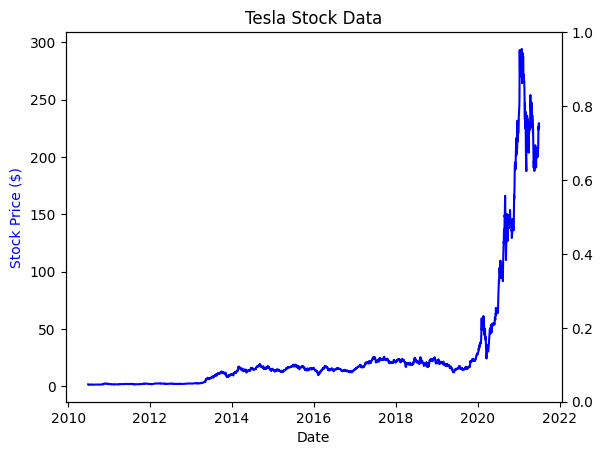

In [122]:
import matplotlib.pyplot as plt
def make_graph(stock_data, stock):
    stock_data_2021 = stock_data[stock_data['Date'] <= '2021-06-30']
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(stock_data_2021['Date'], stock_data_2021['Close'], color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)', color='blue')

    ax1.set_title(f'{stock} Stock Data')
    plt.show()

make_graph(tesla_data, 'Tesla')

##  Plotting GameStop Stock Graph


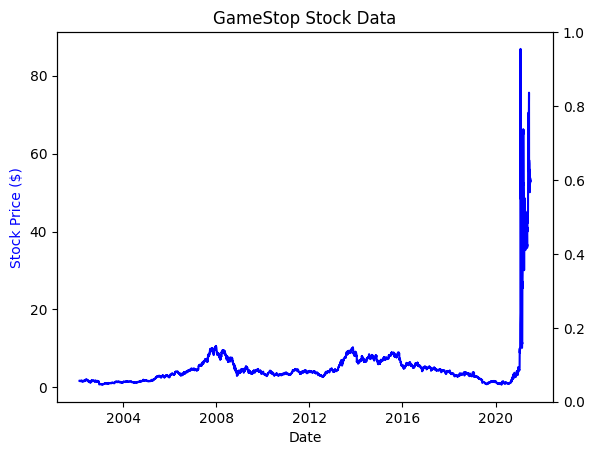

In [123]:
def make_graph(stock_data, stock):
    stock_data_2021 = stock_data[stock_data['Date'] <= '2021-06-30']
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(stock_data_2021['Date'], stock_data_2021['Close'], color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price ($)', color='blue')

    ax1.set_title(f'{stock} Stock Data')
    plt.show()

make_graph(gme_data, 'GameStop')